In [3]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
name = '01'

path = '../Assets/Resources/Intentions/DataSimulation/Bloc/0175/'
path2 = '-01'
contribMin = 0.175
contribMax = 0.175
increment = 0.05

realTest = False
writeAll = True

In [34]:
summaryPd = None
summaryPd = pd.DataFrame(columns = ['SuccessRate', 'MeanDistanceTarget', 'StdDistanceTarget', 'MeanDistCoVRHandVirt', 'StdDistCoVRHandVirt', 'TimeIntentionKnown', 'CheckNbTargets', 'MaxSpeed'])

accuracySummary = None
accuracySummary = pd.DataFrame()

accuracyTarget = None
accuracyTarget = pd.DataFrame()

accuracyCoVR = None
accuracyCoVR = pd.DataFrame()


OneTarget = None
OneTarget = pd.DataFrame()

TwoTargets = None
TwoTargets = pd.DataFrame()
ThreeTargets = None
ThreeTargets = pd.DataFrame()
FourTargets = None
FourTargets = pd.DataFrame()
FiveTargets = None
FiveTargets = pd.DataFrame()

oneTargetSummary = None
oneTargetSummary = pd.DataFrame(columns = ['SuccessRate', 'MeanDistanceTarget', 'StdDistanceTarget', 'MeanDistCoVRHandVirt', 'StdDistCoVRHandVirt', 'TimeIntentionKnown', 'CheckNbTargets', 'MaxSpeed'])
twoTargetSummary = None
twoTargetSummary = pd.DataFrame(columns = ['SuccessRate', 'MeanDistanceTarget', 'StdDistanceTarget', 'MeanDistCoVRHandVirt', 'StdDistCoVRHandVirt', 'TimeIntentionKnown', 'CheckNbTargets', 'MaxSpeed'])
threeTargetSummary = None
threeTargetSummary = pd.DataFrame(columns = ['SuccessRate', 'MeanDistanceTarget', 'StdDistanceTarget', 'MeanDistCoVRHandVirt', 'StdDistCoVRHandVirt', 'TimeIntentionKnown', 'CheckNbTargets', 'MaxSpeed'])
fourTargetSummary = None
fourTargetSummary = pd.DataFrame(columns = ['SuccessRate', 'MeanDistanceTarget', 'StdDistanceTarget', 'MeanDistCoVRHandVirt', 'StdDistCoVRHandVirt', 'TimeIntentionKnown', 'CheckNbTargets', 'MaxSpeed'])
fiveTargetSummary = None
fiveTargetSummary = pd.DataFrame(columns = ['SuccessRate', 'MeanDistanceTarget', 'StdDistanceTarget', 'MeanDistCoVRHandVirt', 'StdDistCoVRHandVirt', 'TimeIntentionKnown', 'CheckNbTargets', 'MaxSpeed'])

accuracyOne = None
accuracyTwo = None
accuracyThree = None
accuracyFour = None
accuracyFive = None

accuracyOne = pd.DataFrame()
accuracyTwo = pd.DataFrame()
accuracyThree = pd.DataFrame()
accuracyFour = pd.DataFrame()
accuracyFive = pd.DataFrame()
    

for i in range(int(contribMin*1000), int(contribMax*1000 + increment*1000), int(increment*1000)):
    contribDist = i
    contribAngle = 1000 - contribDist
    
# FOR I IN RANGE CONTRIBMIN CONTRIBMAX INCREMENT 0.05: do all and get summary
    contribDist = contribDist/1000
    contribAngle = contribAngle/1000
    Contrib01 = None
    Contrib01 = pd.read_csv(path + str(contribDist) + '-' + str(contribAngle) + path2 + '.csv', sep = ";", decimal = ',')
    
    contribDist = float(contribDist)
    contribAngle = float(contribAngle)
    
    list_names = Contrib01.columns.values
    for i in range(0, math.floor(Contrib01.columns.size/2)):
        del Contrib01[list_names[2*i]]

        Contrib01.columns.values[i] = list_names[2*i]
        Contrib01.index = Contrib01['Time']
    del Contrib01['Time']

    
    targetCoVR = None
    targetCoVR = pd.DataFrame()
    
    targetOne = None
    targetTwo = None
    targetThree = None
    targetFour = None
    targetFive = None
    
    targetOne = pd.DataFrame()
    targetTwo = pd.DataFrame()
    targetThree = pd.DataFrame()
    targetFour = pd.DataFrame()
    targetFive = pd.DataFrame()
    
    Contrib01['Weight_OOI_Picked'] = [contribDist*(1/(1 + float(Contrib01['OOI_' + str(Contrib01['OOI_Picked'].values[i]) + '_Dist'].values[i])) + contribAngle*math.exp(3*math.cos(float(Contrib01['OOI_' + str(Contrib01['OOI_Picked'].values[i]) + '_Angle'].values[i])) - 1)) for i in range(0, Contrib01.index.size)]
    Contrib01['WeightUnityOOIPicked'] = [float(Contrib01['OOI_' + str(Contrib01['OOI_Picked'].values[i]) + '_weight'].values[i]) for i in range(0, Contrib01.index.size)]

    Contrib01['UserXZ'] = [float(Contrib01['PosUserZ'].values[i])**2 + float(Contrib01['PosUserX'].values[i])**2 for i in range(0, Contrib01.index.size)]
    Contrib01['ProxyXZ'] = [float(Contrib01['PosProxyX'].values[i])**2 + float(Contrib01['PosProxyZ'].values[i])**2 for i in range(0, Contrib01.index.size)]
    Contrib01['PosCoVR_EncXZ'] = [float(Contrib01['PosCoVR_EncX'].values[i])**2 + float(Contrib01['PosCoVR_EncZ'].values[i])**2 for i in range(0,Contrib01.index.size)]


    Comparison = None
    Comparison = pd.DataFrame()
    
    j = 0
    k = 0
    time_diff = 0
    list_time = []
    list_i = []
    list_i_1 = []
    for i in range(20, Contrib01.index.size):
        if(float(Contrib01['WeightUnityOOIPicked'].values[i]) == 1) and (float(Contrib01['WeightUnityOOIPicked'].values[i-1]) != 1):
            k = float(Contrib01.index.values[i])
        if ((float(Contrib01['TargetToTouch.x'].values[i]) != float(Contrib01['TargetToTouch.x'].values[i-1]))):
            #and (abs(float(Contrib01['PosHandX'].values[i-1])) - abs(float(Contrib01['PosTargetX'].values[i-1])) < 0.05) and float(Contrib01['TargetToTouch.z'].values[i]) != float(Contrib01['TargetToTouch.z'].values[i-1]) and (abs(float(Contrib01['PosHandZ'].values[i-1])) - abs(float(Contrib01['PosTargetZ'].values[i-1])) < 0.05)):
            j = j + 1
            list_i.append(i-1)
            list_i_1.append(i-2)
            time_diff = float(Contrib01.index.values[i]) - k
            list_time.append(time_diff)

    Comparison['PosTargetToTouch'] = [float(Contrib01['TargetToTouch.x'].values[list_i[i]])**2 + float(Contrib01['TargetToTouch.z'].values[list_i[i]])**2 for i in range(0,j)]
    Comparison['PosUserXZ'] = [float(Contrib01['PosUserX'].values[list_i[i]])**2 + float(Contrib01['PosUserZ'].values[list_i[i]])**2 for i in range(0,j)]
    #Comparison['PosHandUser'] = Contrib01['PosUserX']**2 + Contrib01['PosUserZ']**2
    # MEASURE DISTANCE POSHANDUSER AND CoVROPT
    Comparison['PosHandUserXZ'] = [float(Contrib01['PosHandX'].values[list_i[i]])**2 + float(Contrib01['PosHandZ'].values[list_i[i]])**2 for i in range(0,j)]
    Comparison['PosHandOptXZ'] = [float(Contrib01['PosHandOptX'].values[list_i[i]])**2 + float(Contrib01['PosHandOptZ'].values[list_i[i]])**2 for i in range(0,j)]
    Comparison['PosProxyXZ'] = [float(Contrib01['PosProxyX'].values[list_i[i]])**2 + float(Contrib01['PosProxyZ'].values[list_i[i]])**2 for i in range(0,j)]
    Comparison['PosCoVR_EncXZ'] = [float(Contrib01['PosCoVR_EncX'].values[list_i[i]])**2 + float(Contrib01['PosCoVR_EncZ'].values[list_i[i]])**2 for i in range(0,j)]
    #Comparison['PosCoVR_OptXZ'] = [Contrib01['PosCoVR_OptX'].values[list_i[i]]**2 + Contrib01['PosCoVR_OptZ'].values[list_i[i]]**2 for i in range(0,j)]

    if(realTest):
        Comparison['DistanceToTarget'] = Comparison['PosTargetToTouch'] - Comparison['PosCoVR_EncXZ']
    else:
        Comparison['DistanceToTarget'] = Comparison['PosTargetToTouch'] - Comparison['PosProxyXZ']
    #Comparison['DistanceProxyCoVR'] = [Contrib01['PosTargetX'].values[list_i[i]]**2 + Contrib01['PosTargetZ'].values[list_i[i]]**2 - Comparison['PosCoVR_EncXZ'].values[i] for i in range(0,j)]

    Comparison['DistanceProxyTargetCoVR'] = [float(Contrib01['PosProxyX'].values[list_i[i]])**2 + float(Contrib01['PosProxyZ'].values[list_i[i]])**2 - Comparison['PosCoVR_EncXZ'].values[i] for i in range(0,j)]
    Comparison['AbsoluteDistanceToTarget'] = Comparison['DistanceToTarget'].abs()
    Comparison['AbsoluteDistanceProxCoVR'] = Comparison['DistanceProxyTargetCoVR'].abs()

    Comparison['AbsoluteDist_Hand_CoVR'] = Comparison['PosHandUserXZ'] - Comparison['PosCoVR_EncXZ']
    Comparison['AbsoluteDist_Hand_CoVR'] = Comparison['AbsoluteDist_Hand_CoVR'].abs()


    Comparison['WeightUnity'] = [float(Contrib01['WeightUnityOOIPicked'].values[list_i[i]])**2 for i in range(0,j)]
    Comparison['TimeDiffIntentionKnown'] = [list_time[i] for i in range(0,j)]
    #GET I FOR WEIGHT = 1, MEASURE TIME DIFFERENCE

    Comparison['NbTargetsInScene'] = [float(Contrib01['NbTargetInScene'].values[list_i[i]]) for i in range(0,j)]
    cond_inPlace = (Comparison['AbsoluteDistanceToTarget'] <= 0.1)
    
    posDif = [float(Contrib01['PosCoVR_EncXZ'].values[list_i[i]]) - float(Contrib01['PosCoVR_EncXZ'].values[list_i_1[i]]) for i in range(0,j)]
    #cond_inPlace = [(posDif[i] < 0.005) for i in range(0,j)]
    
    
    Comparison['BoolInPlace'] = cond_inPlace
    #print(Comparison['BoolInPlace'])
    #Supposed to be the same! (and is)
    #Comparison['BoolInPlace'] = [bool(Contrib01['CoVRinPlace'].values[list_i[i]]) for i in range(0,j)]
    #THIS IS THE ONE
    
    
    
    # SUMMARY: cond_inPlace valuecounts
    tauxReussite = cond_inPlace.value_counts()/cond_inPlace.shape * 100
    #j
    #print(Comparison['TimeDiffIntentionKnown'])
    dict_Dist = {}
    dict_Dist = {Comparison['AbsoluteDistanceProxCoVR'].describe().index[i] : Comparison['AbsoluteDistanceProxCoVR'].describe().values[i] for i in range(0, Comparison.describe().index.size)}
    #print(dict)
    accuracyCoVR = pd.DataFrame.from_dict(dict_Dist, orient = 'index')
    accuracyCoVR.columns = [contribDist]
    
    dict_Target = {}
    dict_Target = {Comparison['AbsoluteDistanceToTarget'].describe().index[i] : Comparison['AbsoluteDistanceToTarget'].describe().values[i] for i in range(0, Comparison.describe().index.size)}

    targetCoVR = pd.DataFrame.from_dict(dict_Target, orient = 'index')
    targetCoVR.columns = [contribDist]    
    Comparison['Time'] = [list_i[i] for i in range(0,j)]
    
    OneTarget = Comparison[Comparison['NbTargetsInScene'] == 1.0]
    tauxOne = (OneTarget['AbsoluteDistanceToTarget'] <= 0.1).value_counts()/OneTarget['BoolInPlace'].shape * 100
    
    TwoTargets = Comparison[Comparison['NbTargetsInScene'] == 2.0]
    tauxTwo = (TwoTargets['AbsoluteDistanceToTarget'] <= 0.1).value_counts()/TwoTargets['BoolInPlace'].shape * 100
    
    ThreeTargets = Comparison[Comparison['NbTargetsInScene'] == 3.0]
    tauxThree = (ThreeTargets['AbsoluteDistanceToTarget'] <= 0.1).value_counts()/ThreeTargets['BoolInPlace'].shape * 100
    
    FourTargets = Comparison[Comparison['NbTargetsInScene'] == 4.0]
    tauxFour = (FourTargets['AbsoluteDistanceToTarget'] <= 0.1).value_counts()/FourTargets['BoolInPlace'].shape * 100
    
    FiveTargets = Comparison[Comparison['NbTargetsInScene'] == 5.0]
    tauxFive = (FiveTargets['AbsoluteDistanceToTarget'] <= 0.1).value_counts()/FiveTargets['BoolInPlace'].shape * 100
    dict_oneTarget = {}
    dict_oneTarget = {OneTarget['AbsoluteDistanceToTarget'].describe().index[i] : OneTarget['AbsoluteDistanceToTarget'].describe().values[i] for i in range(0, OneTarget.describe().index.size)}
    dict_twoTarget = {}
    dict_twoTarget = {TwoTargets['AbsoluteDistanceToTarget'].describe().index[i] : TwoTargets['AbsoluteDistanceToTarget'].describe().values[i] for i in range(0, TwoTargets.describe().index.size)}
    dict_threeTarget = {}
    dict_threeTarget = {ThreeTargets['AbsoluteDistanceToTarget'].describe().index[i] : ThreeTargets['AbsoluteDistanceToTarget'].describe().values[i] for i in range(0, ThreeTargets.describe().index.size)}
    dict_fourTarget = {}
    dict_fourTarget = {FourTargets['AbsoluteDistanceToTarget'].describe().index[i] : FourTargets['AbsoluteDistanceToTarget'].describe().values[i] for i in range(0, FourTargets.describe().index.size)}
    dict_fiveTarget = {}
    dict_fiveTarget = {FiveTargets['AbsoluteDistanceToTarget'].describe().index[i] : FiveTargets['AbsoluteDistanceToTarget'].describe().values[i] for i in range(0, FiveTargets.describe().index.size)}
    
    targetOne = pd.DataFrame.from_dict(dict_oneTarget, orient = 'index')
    targetOne.columns = [contribDist]
    targetTwo = pd.DataFrame.from_dict(dict_twoTarget, orient = 'index')
    targetTwo.columns = [contribDist]
    targetThree = pd.DataFrame.from_dict(dict_threeTarget, orient = 'index')
    targetThree.columns = [contribDist]
    targetFour = pd.DataFrame.from_dict(dict_fourTarget, orient = 'index')
    targetFour.columns = [contribDist]   
    targetFive = pd.DataFrame.from_dict(dict_fiveTarget, orient = 'index')
    targetFive.columns = [contribDist]   
    
    accuracySummary = accuracySummary.append(accuracyCoVR.transpose())
    accuracyTarget = accuracyTarget.append(targetCoVR.transpose())
    
    accuracyOne = accuracyOne.append(targetOne.transpose())
    accuracyTwo = accuracyTwo.append(targetTwo.transpose())
    accuracyThree = accuracyThree.append(targetThree.transpose())
    accuracyFour = accuracyFour.append(targetFour.transpose())
    accuracyFive = accuracyFive.append(targetFive.transpose())
    
    summaryPd.loc[contribDist] = pd.Series({'SuccessRate' : tauxReussite[True], 'MeanDistanceTarget' : Comparison['AbsoluteDistanceToTarget'].mean(), 'StdDistanceTarget' : Comparison['AbsoluteDistanceToTarget'].std(), 'MeanDistCoVRHandVirt' : Comparison['AbsoluteDist_Hand_CoVR'].mean(), 'StdDistCoVRHandVirt' : Comparison['AbsoluteDist_Hand_CoVR'].std(), 'TimeIntentionKnown' : Comparison['TimeDiffIntentionKnown'].mean(), 'CheckNbTargets' : j})
    
    oneTargetSummary.loc[contribDist] = pd.Series({'SuccessRate' : tauxOne[True], 'MeanDistanceTarget' : OneTarget['AbsoluteDistanceToTarget'].mean(), 'StdDistanceTarget' : OneTarget['AbsoluteDistanceToTarget'].std(), 'MeanDistCoVRHandVirt' : OneTarget['AbsoluteDist_Hand_CoVR'].mean(), 'StdDistCoVRHandVirt' : OneTarget['AbsoluteDist_Hand_CoVR'].std(), 'TimeIntentionKnown' : OneTarget['TimeDiffIntentionKnown'].mean(), 'CheckNbTargets' : OneTarget['BoolInPlace'].shape})
    twoTargetSummary.loc[contribDist] = pd.Series({'SuccessRate' : tauxTwo[True], 'MeanDistanceTarget' : TwoTargets['AbsoluteDistanceToTarget'].mean(), 'StdDistanceTarget' : TwoTargets['AbsoluteDistanceToTarget'].std(), 'MeanDistCoVRHandVirt' : TwoTargets['AbsoluteDist_Hand_CoVR'].mean(), 'StdDistCoVRHandVirt' : TwoTargets['AbsoluteDist_Hand_CoVR'].std(), 'TimeIntentionKnown' : TwoTargets['TimeDiffIntentionKnown'].mean(), 'CheckNbTargets' : TwoTargets['BoolInPlace'].shape})
    threeTargetSummary.loc[contribDist] = pd.Series({'SuccessRate' : tauxThree[True], 'MeanDistanceTarget' : ThreeTargets['AbsoluteDistanceToTarget'].mean(), 'StdDistanceTarget' : ThreeTargets['AbsoluteDistanceToTarget'].std(), 'MeanDistCoVRHandVirt' : ThreeTargets['AbsoluteDist_Hand_CoVR'].mean(), 'StdDistCoVRHandVirt' : ThreeTargets['AbsoluteDist_Hand_CoVR'].std(), 'TimeIntentionKnown' : ThreeTargets['TimeDiffIntentionKnown'].mean(), 'CheckNbTargets' : ThreeTargets['BoolInPlace'].shape})
    fourTargetSummary.loc[contribDist] = pd.Series({'SuccessRate' : tauxFour[True], 'MeanDistanceTarget' : FourTargets['AbsoluteDistanceToTarget'].mean(), 'StdDistanceTarget' : FourTargets['AbsoluteDistanceToTarget'].std(), 'MeanDistCoVRHandVirt' : FourTargets['AbsoluteDist_Hand_CoVR'].mean(), 'StdDistCoVRHandVirt' : FourTargets['AbsoluteDist_Hand_CoVR'].std(), 'TimeIntentionKnown' : FourTargets['TimeDiffIntentionKnown'].mean(), 'CheckNbTargets' : FourTargets['BoolInPlace'].shape})
    fiveTargetSummary.loc[contribDist] = pd.Series({'SuccessRate' : tauxFive[True], 'MeanDistanceTarget' : FiveTargets['AbsoluteDistanceToTarget'].mean(), 'StdDistanceTarget' : FiveTargets['AbsoluteDistanceToTarget'].std(), 'MeanDistCoVRHandVirt' : FiveTargets['AbsoluteDist_Hand_CoVR'].mean(), 'StdDistCoVRHandVirt' : FiveTargets['AbsoluteDist_Hand_CoVR'].std(), 'TimeIntentionKnown' : FiveTargets['TimeDiffIntentionKnown'].mean(), 'CheckNbTargets' : FiveTargets['BoolInPlace'].shape})
    
    if(writeAll == True):
        OneTarget.to_csv('./SummarySimulation/Bloc/AllOnes/'+ name + '-' + str(contribDist) + '.csv')
        TwoTargets.to_csv('./SummarySimulation/Bloc/AllTwos/'+ name + '-' +str(contribDist) + '.csv')
        ThreeTargets.to_csv('./SummarySimulation/Bloc/AllThrees/'+ name + '-' + str(contribDist) + '.csv')
        FourTargets.to_csv('./SummarySimulation/Bloc/AllFour/'+ name + '-' + str(contribDist) + '.csv')
        FiveTargets.to_csv('./SummarySimulation/Bloc/AllFive/'+ name + '-' + str(contribDist) + '.csv')

accuracySummary = accuracySummary.transpose()
accuracyTarget = accuracyTarget.transpose()

accuracyOne = accuracyOne.transpose()
accuracyTwo = accuracyTwo.transpose()
accuracyThree = accuracyThree.transpose()
accuracyFour = accuracyFour.transpose()
accuracyFive = accuracyFive.transpose()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (81,87) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [35]:
summaryPd

SuccessRate  MeanDistanceTarget  StdDistanceTarget  \
0.175         92.0            0.020106           0.040119   

       MeanDistCoVRHandVirt  StdDistCoVRHandVirt  TimeIntentionKnown  \
0.175              3.281955             0.455661            5.322852   

       CheckNbTargets  MaxSpeed  
0.175            50.0       NaN

In [36]:
FiveTargets

PosTargetToTouch  PosUserXZ  PosHandUserXZ  PosHandOptXZ  PosProxyXZ  \
4           0.782727   0.748681       0.791360      1.849728    0.780888   
7           0.629343   1.020091       0.637152      1.286470    0.629175   
14          0.524231   0.061052       0.492595      1.558203    0.496856   
17          1.152329   0.620712       1.141260      0.074581    1.145801   
23          0.758953   1.343913       0.827541      2.485483    0.746939   
25          0.105448   0.292680       0.087611      0.329693    0.105368   
34          1.363851   1.863282       1.366489      2.206876    1.285111   
35          0.768499   1.075502       0.736351      0.118564    0.768499   
41          0.933283   0.181625       0.870252      1.767269    0.818364   
47          0.574025   0.972025       0.562656      1.656224    0.591120   

    PosCoVR_EncXZ  DistanceToTarget  DistanceProxyTargetCoVR  \
4         4.18296          0.001839                -3.402072   
7         4.18296          0.000168                -3.553785   
14        4.18296          0.027375                -3.686104   
17        4.18296          0.006528                -3.037159   
23        4.18296          0.012014                -3.436021   
25        4.18296          0.000080                -4.077593   
34        4.18296          0.078740                -2.897849   
35        4.18296          0.000000                -3.414461   
41        4.18296          0.114920                -3.364597   
47        4.18296         -0.017095                -3.591840   

    AbsoluteDistanceToTarget  AbsoluteDistanceProxCoVR  \
4                   0.001839                  3.402072   
7                   0.000168                  3.553785   
14                  0.027375                  3.686104   
17                  0.006528                  3.037159   
23                  0.012014                  3.436021   
25                  0.000080                  4.077593   
34                  0.078740                  2.897849   
35                  0.000000                  3.414461   
41                  0.114920                  3.364597   
47                  0.017095                  3.591840   

    AbsoluteDist_Hand_CoVR  WeightUnity  TimeDiffIntentionKnown  \
4                 3.391600          1.0                  5.0806   
7                 3.545808          1.0                  4.8171   
14                3.690366          1.0                  3.5553   
17                3.041700          1.0                  3.8609   
23                3.355419          1.0                  2.6506   
25                4.095350          1.0                  8.7373   
34                2.816471          1.0                  1.5994   
35                3.446609          1.0                  8.2293   
41                3.312708          1.0                  2.8361   
47                3.620305          1.0                  4.5704   

    NbTargetsInScene  BoolInPlace   Time  
4                5.0         True   8458  
7                5.0         True  11519  
14               5.0         True  15915  
17               5.0         True  18079  
23               5.0         True  24279  
25               5.0         True  25920  
34               5.0         True  33136  
35               5.0         True  34089  
41               5.0        False  37456  
47               5.0         True  40606

In [37]:
oneTargetSummary

SuccessRate  MeanDistanceTarget  StdDistanceTarget  \
0.175         90.0             0.01321           0.041377   

       MeanDistCoVRHandVirt  StdDistCoVRHandVirt  TimeIntentionKnown  \
0.175              3.081574             0.482941             5.06545   

      CheckNbTargets  MaxSpeed  
0.175          (10,)       NaN

In [38]:
twoTargetSummary

SuccessRate  MeanDistanceTarget  StdDistanceTarget  \
0.175        100.0            0.021649           0.035542   

       MeanDistCoVRHandVirt  StdDistCoVRHandVirt  TimeIntentionKnown  \
0.175              3.203052             0.590455            5.776674   

      CheckNbTargets  MaxSpeed  
0.175          (10,)       NaN

In [39]:
threeTargetSummary

SuccessRate  MeanDistanceTarget  StdDistanceTarget  \
0.175         80.0            0.031471            0.05928   

       MeanDistCoVRHandVirt  StdDistCoVRHandVirt  TimeIntentionKnown  \
0.175               3.42087             0.357574            5.463726   

      CheckNbTargets  MaxSpeed  
0.175          (10,)       NaN

In [40]:
fourTargetSummary

SuccessRate  MeanDistanceTarget  StdDistanceTarget  \
0.175        100.0            0.008323           0.018284   

       MeanDistCoVRHandVirt  StdDistCoVRHandVirt  TimeIntentionKnown  \
0.175              3.272646             0.446734             5.71471   

      CheckNbTargets  MaxSpeed  
0.175          (10,)       NaN

In [41]:
fiveTargetSummary

SuccessRate  MeanDistanceTarget  StdDistanceTarget  \
0.175         90.0            0.025876            0.03936   

       MeanDistCoVRHandVirt  StdDistCoVRHandVirt  TimeIntentionKnown  \
0.175              3.431634             0.350927              4.5937   

      CheckNbTargets  MaxSpeed  
0.175          (10,)       NaN

In [42]:
accuracyTarget

0.175
count  50.000000
mean    0.020106
std     0.040119
min     0.000000
25%     0.000026
50%     0.000460
75%     0.012649
max     0.169540

In [43]:
accuracyOne

0.175
count  10.000000
mean    0.013210
std     0.041377
min     0.000000
25%     0.000000
50%     0.000000
75%     0.000382
max     0.130970

In [44]:
accuracyTwo

0.175
count  10.000000
mean    0.021649
std     0.035542
min     0.000000
25%     0.000104
50%     0.000712
75%     0.026992
max     0.095874

In [45]:
accuracyThree

0.175
count  10.000000
mean    0.031471
std     0.059280
min     0.000000
25%     0.000101
50%     0.005251
75%     0.012117
max     0.169540

In [46]:
accuracyFour

0.175
count  10.000000
mean    0.008323
std     0.018284
min     0.000000
25%     0.000098
50%     0.000389
75%     0.001655
max     0.056189

In [47]:
accuracyFive

0.175
count  10.000000
mean    0.025876
std     0.039360
min     0.000000
25%     0.000585
50%     0.009271
75%     0.024805
max     0.114920

In [48]:
accuracySummary

0.175
count  50.000000
mean    3.291717
std     0.462602
min     1.995961
25%     3.031510
50%     3.422428
75%     3.585322
max     4.182844

In [49]:
summaryPd.to_csv('./SummarySimulation/Bloc/Summary/' + name +'_MaxSuccess' + str(summaryPd['SuccessRate'].max()) + '%-Summary.csv')
accuracyTarget.to_csv('./SummarySimulation/Bloc/AccuracyToTarget/'+ name +'_MaxSuccess' + str(summaryPd['SuccessRate'].max()) + '%-DistToTarget.csv')


In [50]:
if(realTest == True):
    accuracySummary.to_csv('./SummarySimulation/Bloc/AccuracyToProxy/' + name +'_MaxSuccess' + str(summaryPd['SuccessRate'].max()) + '%-AccuracyCoVR.csv')

In [51]:
oneTargetSummary.to_csv('./SummarySimulation/Bloc/1Target/'+ name +'_MaxSuccess' + str(oneTargetSummary['SuccessRate'].max()) + '%.csv')
twoTargetSummary.to_csv('./SummarySimulation/Bloc/2Targets/'+ name +'_MaxSuccess' + str(twoTargetSummary['SuccessRate'].max()) + '%.csv')
threeTargetSummary.to_csv('./SummarySimulation/Bloc/3Targets/'+ name +'_MaxSuccess' + str(threeTargetSummary['SuccessRate'].max()) + '%.csv')
fourTargetSummary.to_csv('./SummarySimulation/Bloc/4Targets/'+ name +'_MaxSuccess' + str(fourTargetSummary['SuccessRate'].max()) + '%.csv')
fiveTargetSummary.to_csv('./SummarySimulation/Bloc/5Targets/'+ name +'_MaxSuccess' + str(fiveTargetSummary['SuccessRate'].max()) + '%.csv')

accuracyOne.to_csv('./SummarySimulation/Bloc/1Target/'+ name +'_MaxSuccess' + str(oneTargetSummary['SuccessRate'].max()) + '%.csv')
accuracyTwo.to_csv('./SummarySimulation/Bloc/2Targets/'+ name +'_MaxSuccess' + str(twoTargetSummary['SuccessRate'].max()) + '%.csv')
accuracyThree.to_csv('./SummarySimulation/Bloc/3Targets/'+ name +'_MaxSuccess' + str(threeTargetSummary['SuccessRate'].max()) + '%.csv')
accuracyFour.to_csv('./SummarySimulation/Bloc/4Targets/'+ name +'_MaxSuccess' + str(fourTargetSummary['SuccessRate'].max()) + '%.csv')
accuracyFive.to_csv('./SummarySimulation/Bloc/5Targets/'+ name +'_MaxSuccess' + str(fiveTargetSummary['SuccessRate'].max()) + '%.csv')



In [52]:
newPD = None
newPD = pd.DataFrame()

newPD['Average'] = summaryPd['SuccessRate']
newPD['OneTarget'] = oneTargetSummary['SuccessRate']
newPD['TwoTargets'] = twoTargetSummary['SuccessRate']
newPD['ThreeTargets'] = threeTargetSummary['SuccessRate']
newPD['FourTargets'] = fourTargetSummary['SuccessRate']
newPD['FiveTargets'] = fiveTargetSummary['SuccessRate']

newPD.to_csv('./SummarySimulation/Bloc/PerUserPerTarget/'+ name + '.csv')


#newPD.append(oneTargetSummary['SuccessRate'])
#newPD.append(twoTargetSummary['SuccessRate'])
#newPD.append(threeTargetSummary['SuccessRate'])
#newPD.append(fourTargetSummary['SuccessRate'])
#newPD.append(fiveTargetSummary['SuccessRate'])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_core.py:1001: UserWarning: Attempting to set identical left == right == 0.175 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


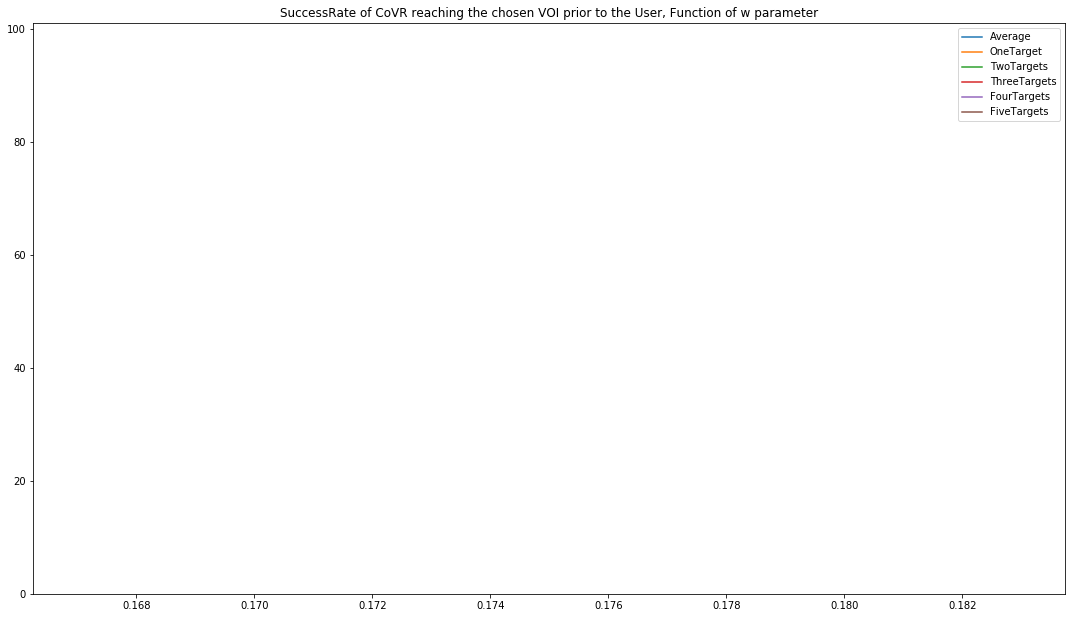

In [53]:
#fig, axis = plt.subplots()
newPD.plot(figsize = (18.5, 10.5), legend = True, ylim = (0,101), title = "SuccessRate of CoVR reaching the chosen VOI prior to the User, Function of w parameter")
#x = "w - Contribution of Distance over Angle", y = "Success Rate"
plt.savefig('./SummarySimulation/'+ name +'_AllTargets_MaxSuccess' + str(summaryPd['SuccessRate'].max()) + '%.png')
#fig.set_size_inches(18.5, 10.5)

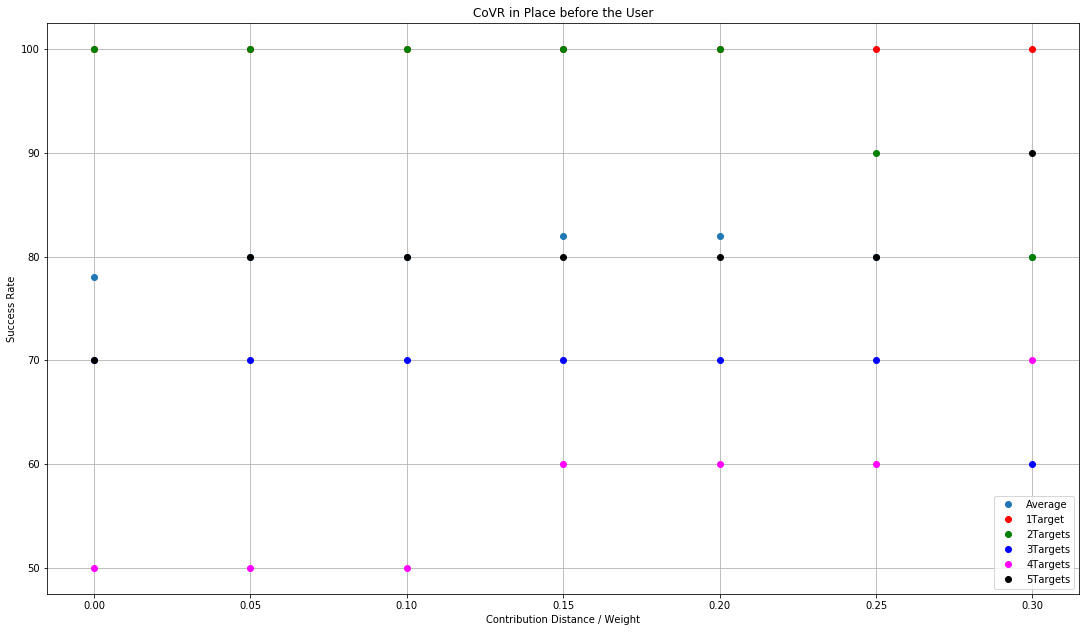

In [95]:
fig, axis = plt.subplots()
axis.set_xlabel('Contribution Distance / Weight')
axis.set_ylabel('Success Rate')
axis.set_title('CoVR in Place before the User')
axis.grid(True)
x = oneTargetSummary.index
y = summaryPd['SuccessRate']


t = summaryPd.index
plt.plot(t, summaryPd['SuccessRate'], 'o', label = 'Average')
#summaryPd['SuccessRate'].plot(kind = 'bar')
l = oneTargetSummary['SuccessRate']
plt.plot(t, l, 'o', color = 'red', label = '1Target')
m = twoTargetSummary['SuccessRate']
plt.plot(t, m, 'o', color = 'green', label = '2Targets')
n = threeTargetSummary['SuccessRate']
plt.plot(t, n, 'o', color = 'blue', label = '3Targets')
p = fourTargetSummary['SuccessRate']
plt.plot(t, p, 'o', color = 'magenta', label = '4Targets')
q = fiveTargetSummary['SuccessRate']
plt.plot(t, q, 'o', color = 'black', label = '5Targets')
#oneTargetSummary['SuccessRate'].plot.bar()
#axis.scatter(x,y)
fig.set_size_inches(18.5, 10.5)

fig.savefig('./SummarySimulation/'+ name +'_MaxSuccess' + str(summaryPd['SuccessRate'].max()) + '%.png')
axis.legend()
plt.show() 

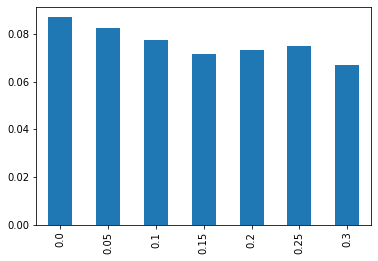

In [96]:
summaryPd['MeanDistanceTarget'].plot.bar()#yerr = summaryPd['StdDistanceTarget']/2)
#fig.savefig('./SummarySimulation/' + str(nbCibles) +'Cibles-Condition#'+ str(numCondition) +'-User#'+ name +'_MeanDistanceToTarget.png')


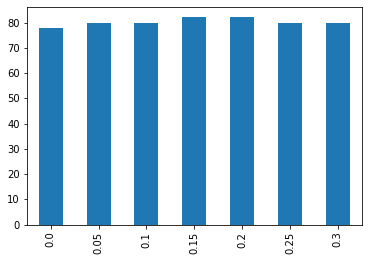

In [97]:
summaryPd['SuccessRate'].plot.bar()
#fig.savefig('./SummarySimulation/' + str(nbCibles) +'Cibles-Condition#'+ str(numCondition) +'-User#'+ name +'_BarChart-MaxSuccess' + str(summaryPd['SuccessRate'].max()) + '%.png')
